# Import

In [1]:
# I/O
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = "1" # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = "1" # export NUMEXPR_NUM_THREADS=1

# Dataset
import numpy as np
import netCDF4 as nc

# Plot
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Video
from IPython.display import Video

# Time
import time

# About data

## About datapath

In [2]:
"""
    example:
    "/data/mog/rce/rce_walker_15k_05m_p3/archive/exp.C.Surface-000000.nc"
    
    This could be decomposed as
    {folder} {case} {subfolder} {filename}
    
    and the filename can be decomposed as 
    {vartype} {time_index} {extension}
"""
def filename_constructor(time_index, args = None):
    [main_folder, casename, subfolder, vartype] = args
    fname = []
    for i_item in main_folder:
        for j_item in casename:
            for k_item in subfolder:
                for l_item in vartype:
                    fname.append(str(i_item) + str(j_item) + str(k_item) + str(l_item) + "-" + str(time_index) + ".nc")
    return fname

print("Current Directory : ", os.getcwd())
path_folder = ["/data/cloud2023/vvmData"]
path_casename = ["/rce_walker_15k_05m_p3", 
                 "/rce_walker_15k_1m_p3",
                 "/rce_walker_1k_1m_p3",
                 "/rce_walker_1k_2m_p3"]
path_subfolder = ["/archive"]
path_vartype = ["/exp.C.LandSurface", 
                "/exp.C.Surface", 
                "/exp.C.Dynamic", 
                "/exp.C.Radiation", 
                "/exp.C.Thermodynamic"]
name_args = [path_folder,
             path_casename,
             path_subfolder,
             [path_vartype[1]]]

iterations = 1200 + 1

# TEST
test_name = filename_constructor(str(np.random.randint(iterations)).zfill(6), name_args)
for item in test_name:
    temp = nc.Dataset(item)
    print(item)
# /data/cloud2023/vvmData/rce_walker_15k_05m_p3/archive/exp.C.Surface-000000.nc

Current Directory :  /data/cloud2023/r12229008/HW1
/data/cloud2023/vvmData/rce_walker_15k_05m_p3/archive/exp.C.Surface-000173.nc
/data/cloud2023/vvmData/rce_walker_15k_1m_p3/archive/exp.C.Surface-000173.nc
/data/cloud2023/vvmData/rce_walker_1k_1m_p3/archive/exp.C.Surface-000173.nc
/data/cloud2023/vvmData/rce_walker_1k_2m_p3/archive/exp.C.Surface-000173.nc


## About dimensions

In [3]:
"""
dimensions:
    Time = UNLIMITED ; // (1 currently)
    south_north = 128 ;
    west_east = 512 ;
"""

'\ndimensions:\n    Time = UNLIMITED ; // (1 currently)\n    south_north = 128 ;\n    west_east = 512 ;\n'

## About grids

In [4]:
"""
float Time(Time) ;
        Time:axis = "Time" ;
        Time:long_name = "Time" ;
        Time:standard_name = "Time" ;
        Time:units = "minutes since 1900-01-01 " ;
double yb(south_north) ;
        yb:axis = "Y" ;
        yb:long_name = "y-coordinate of grid cell boundaries in Cartesian system" ;
        yb:units = "m" ;
double xb(west_east) ;
        xb:axis = "X" ;
        xb:long_name = "x-coordinate of grid cell boundaries in Cartesian system" ;
        xb:units = "m" ;
"""

'\nfloat Time(Time) ;\n        Time:axis = "Time" ;\n        Time:long_name = "Time" ;\n        Time:standard_name = "Time" ;\n        Time:units = "minutes since 1900-01-01 " ;\ndouble yb(south_north) ;\n        yb:axis = "Y" ;\n        yb:long_name = "y-coordinate of grid cell boundaries in Cartesian system" ;\n        yb:units = "m" ;\ndouble xb(west_east) ;\n        xb:axis = "X" ;\n        xb:long_name = "x-coordinate of grid cell boundaries in Cartesian system" ;\n        xb:units = "m" ;\n'

## About variables

In [5]:
"""
float sprec(Time, south_north, west_east) ;
            sprec:long_name = "Surface precipitation rate" ;
            sprec:standard_name = "sfc_precip_rate" ;
            sprec:units = "kg m-2 s-1" ;
            sprec:_FillValue = 9.96921e+36f ;
            sprec:missing_value = 9.96921e+36f ;
float olr(Time, south_north, west_east) ;
            olr:long_name = "Outgoing longwave radiation" ;
            olr:standard_name = "outgoing_longwave_radiation" ;
            olr:units = "W m-2" ;
            olr:_FillValue = 9.96921e+36f ;
            olr:missing_value = 9.96921e+36f ;
"""

'\nfloat sprec(Time, south_north, west_east) ;\n            sprec:long_name = "Surface precipitation rate" ;\n            sprec:standard_name = "sfc_precip_rate" ;\n            sprec:units = "kg m-2 s-1" ;\n            sprec:_FillValue = 9.96921e+36f ;\n            sprec:missing_value = 9.96921e+36f ;\nfloat olr(Time, south_north, west_east) ;\n            olr:long_name = "Outgoing longwave radiation" ;\n            olr:standard_name = "outgoing_longwave_radiation" ;\n            olr:units = "W m-2" ;\n            olr:_FillValue = 9.96921e+36f ;\n            olr:missing_value = 9.96921e+36f ;\n'

# Plot

In [6]:
class GIFs:
    def __init__(self):
        self.fig, self.axes = plt.subplots(nrows = 2,
                                           ncols = 2,
                                           sharex = True,
                                           sharey = True,
                                           figsize=(16, 16),
                                           dpi = 300)
        self.fig.subplots_adjust(hspace = 0.25, wspace = 0.15)
        return None
    def run(self):
        def init():
            fname = filename_constructor(str(0).zfill(6), name_args)[0]
            dataset = nc.Dataset(fname)
            x = dataset.variables["xb"][:] / 1e3 # meter to kilometer
            y = dataset.variables["yb"][:] / 1e3 # meter to kilometer
            xx, yy = np.meshgrid(x, y)
            zz = np.zeros_like(xx)
            
            self.olr_levels = np.linspace(2**0, 2**8, 2**5, dtype = np.int32)
            self.precip_levels = np.linspace(2**0, 2**5, 2**5, dtype = np.int32)
            
            for i in range(2):
                for j in range(2):
                    im1 = self.axes[i, j].contourf(xx, yy, zz, 
                                                   cmap = cm.Greys,
                                                   levels = self.olr_levels,
                                                   extend = "max")
                    im2 = self.axes[i, j].contourf(xx, yy, zz, 
                                                   cmap = cm.jet,
                                                   levels = self.precip_levels,
                                                   extend = "max")
                    self.axes[i, j].set_title(f"{str(path_casename[2*i+j])[1:]}")
                    self.axes[i, j].set_xticks(np.linspace(0,2**10,5, dtype = np.int32))
                    self.axes[i, j].set_xlabel('x (km)')
                    self.axes[i, j].set_yticks(np.linspace(0,2**8,5, dtype = np.int32))
                    self.axes[i, j].set_ylabel('y (km)')
            cbar = self.fig.colorbar(im1, ax=self.axes.ravel().tolist(), aspect=50, pad = 0.0, orientation='horizontal')
            cbar.ax.set_xlabel('OLR (W/m^2)')
            cbar = self.fig.colorbar(im2, ax=self.axes.ravel().tolist(), aspect=50, pad = 0.1, orientation='horizontal')
            cbar.ax.set_xlabel('Precip (mm/hr)')
            return None
        def update(time):
            if (time%int(iterations/100) == 0):
                print(f"Completeness : {int(time/int(iterations/100))}%")
                
            fnames = filename_constructor(str(time).zfill(6), name_args)
            for i in range(2):
                for j in range(2):
                    self.axes[i, j].clear()
                    
            for i in range(2):
                for j in range(2):
                    idx = 2*i+j
                    dataset = nc.Dataset(fnames[idx])
                    x = dataset.variables["xb"][:] / 1e3 # meter to kilometer
                    y = dataset.variables["yb"][:] / 1e3 # meter to kilometer
                    xx, yy = np.meshgrid(x, y)
                    olr = dataset.variables["olr"][-1, :, :]
                    precip = dataset.variables["sprec"][-1, :, :] * 3600 # from mm/sec to mm/hr
                    im1 = self.axes[i, j].contourf(xx, yy, olr, 
                                              cmap = cm.Greys,
                                              levels = self.olr_levels,
                                              extend = "max")
                    im2 = self.axes[i, j].contourf(xx, yy, precip, 
                                              cmap = cm.jet,
                                              levels = self.precip_levels,
                                              extend = "max")
                    self.axes[i, j].set_title(f"{str(path_casename[idx])[1:]}")
                    self.axes[i, j].set_xticks(np.linspace(0,2**10,5, dtype = np.int32))
                    self.axes[i, j].set_xlabel('x (km)')
                    self.axes[i, j].set_yticks(np.linspace(0,2**8,5, dtype = np.int32))
                    self.axes[i, j].set_ylabel('y (km)')
            self.fig.suptitle(f'Iterations : {time}')
            return None
        self.anim = animation.FuncAnimation(fig = self.fig, 
                                       func = update,
                                       frames = iterations, 
                                       init_func = init, 
                                       interval = 30,
                                       blit = False)
        self.anim.save("HW1_A1.mp4")
        return None

Completeness : 0%
Completeness : 1%
Completeness : 2%
Completeness : 3%
Completeness : 4%
Completeness : 5%
Completeness : 6%
Completeness : 7%
Completeness : 8%
Completeness : 9%
Completeness : 10%
Completeness : 11%
Completeness : 12%
Completeness : 13%
Completeness : 14%
Completeness : 15%
Completeness : 16%
Completeness : 17%
Completeness : 18%
Completeness : 19%
Completeness : 20%
Completeness : 21%
Completeness : 22%
Completeness : 23%
Completeness : 24%
Completeness : 25%
Completeness : 26%
Completeness : 27%
Completeness : 28%
Completeness : 29%
Completeness : 30%
Completeness : 31%
Completeness : 32%
Completeness : 33%
Completeness : 34%
Completeness : 35%
Completeness : 36%
Completeness : 37%
Completeness : 38%
Completeness : 39%
Completeness : 40%
Completeness : 41%
Completeness : 42%
Completeness : 43%
Completeness : 44%
Completeness : 45%
Completeness : 46%
Completeness : 47%
Completeness : 48%
Completeness : 49%
Completeness : 50%
Completeness : 51%
Completeness : 52%
Com

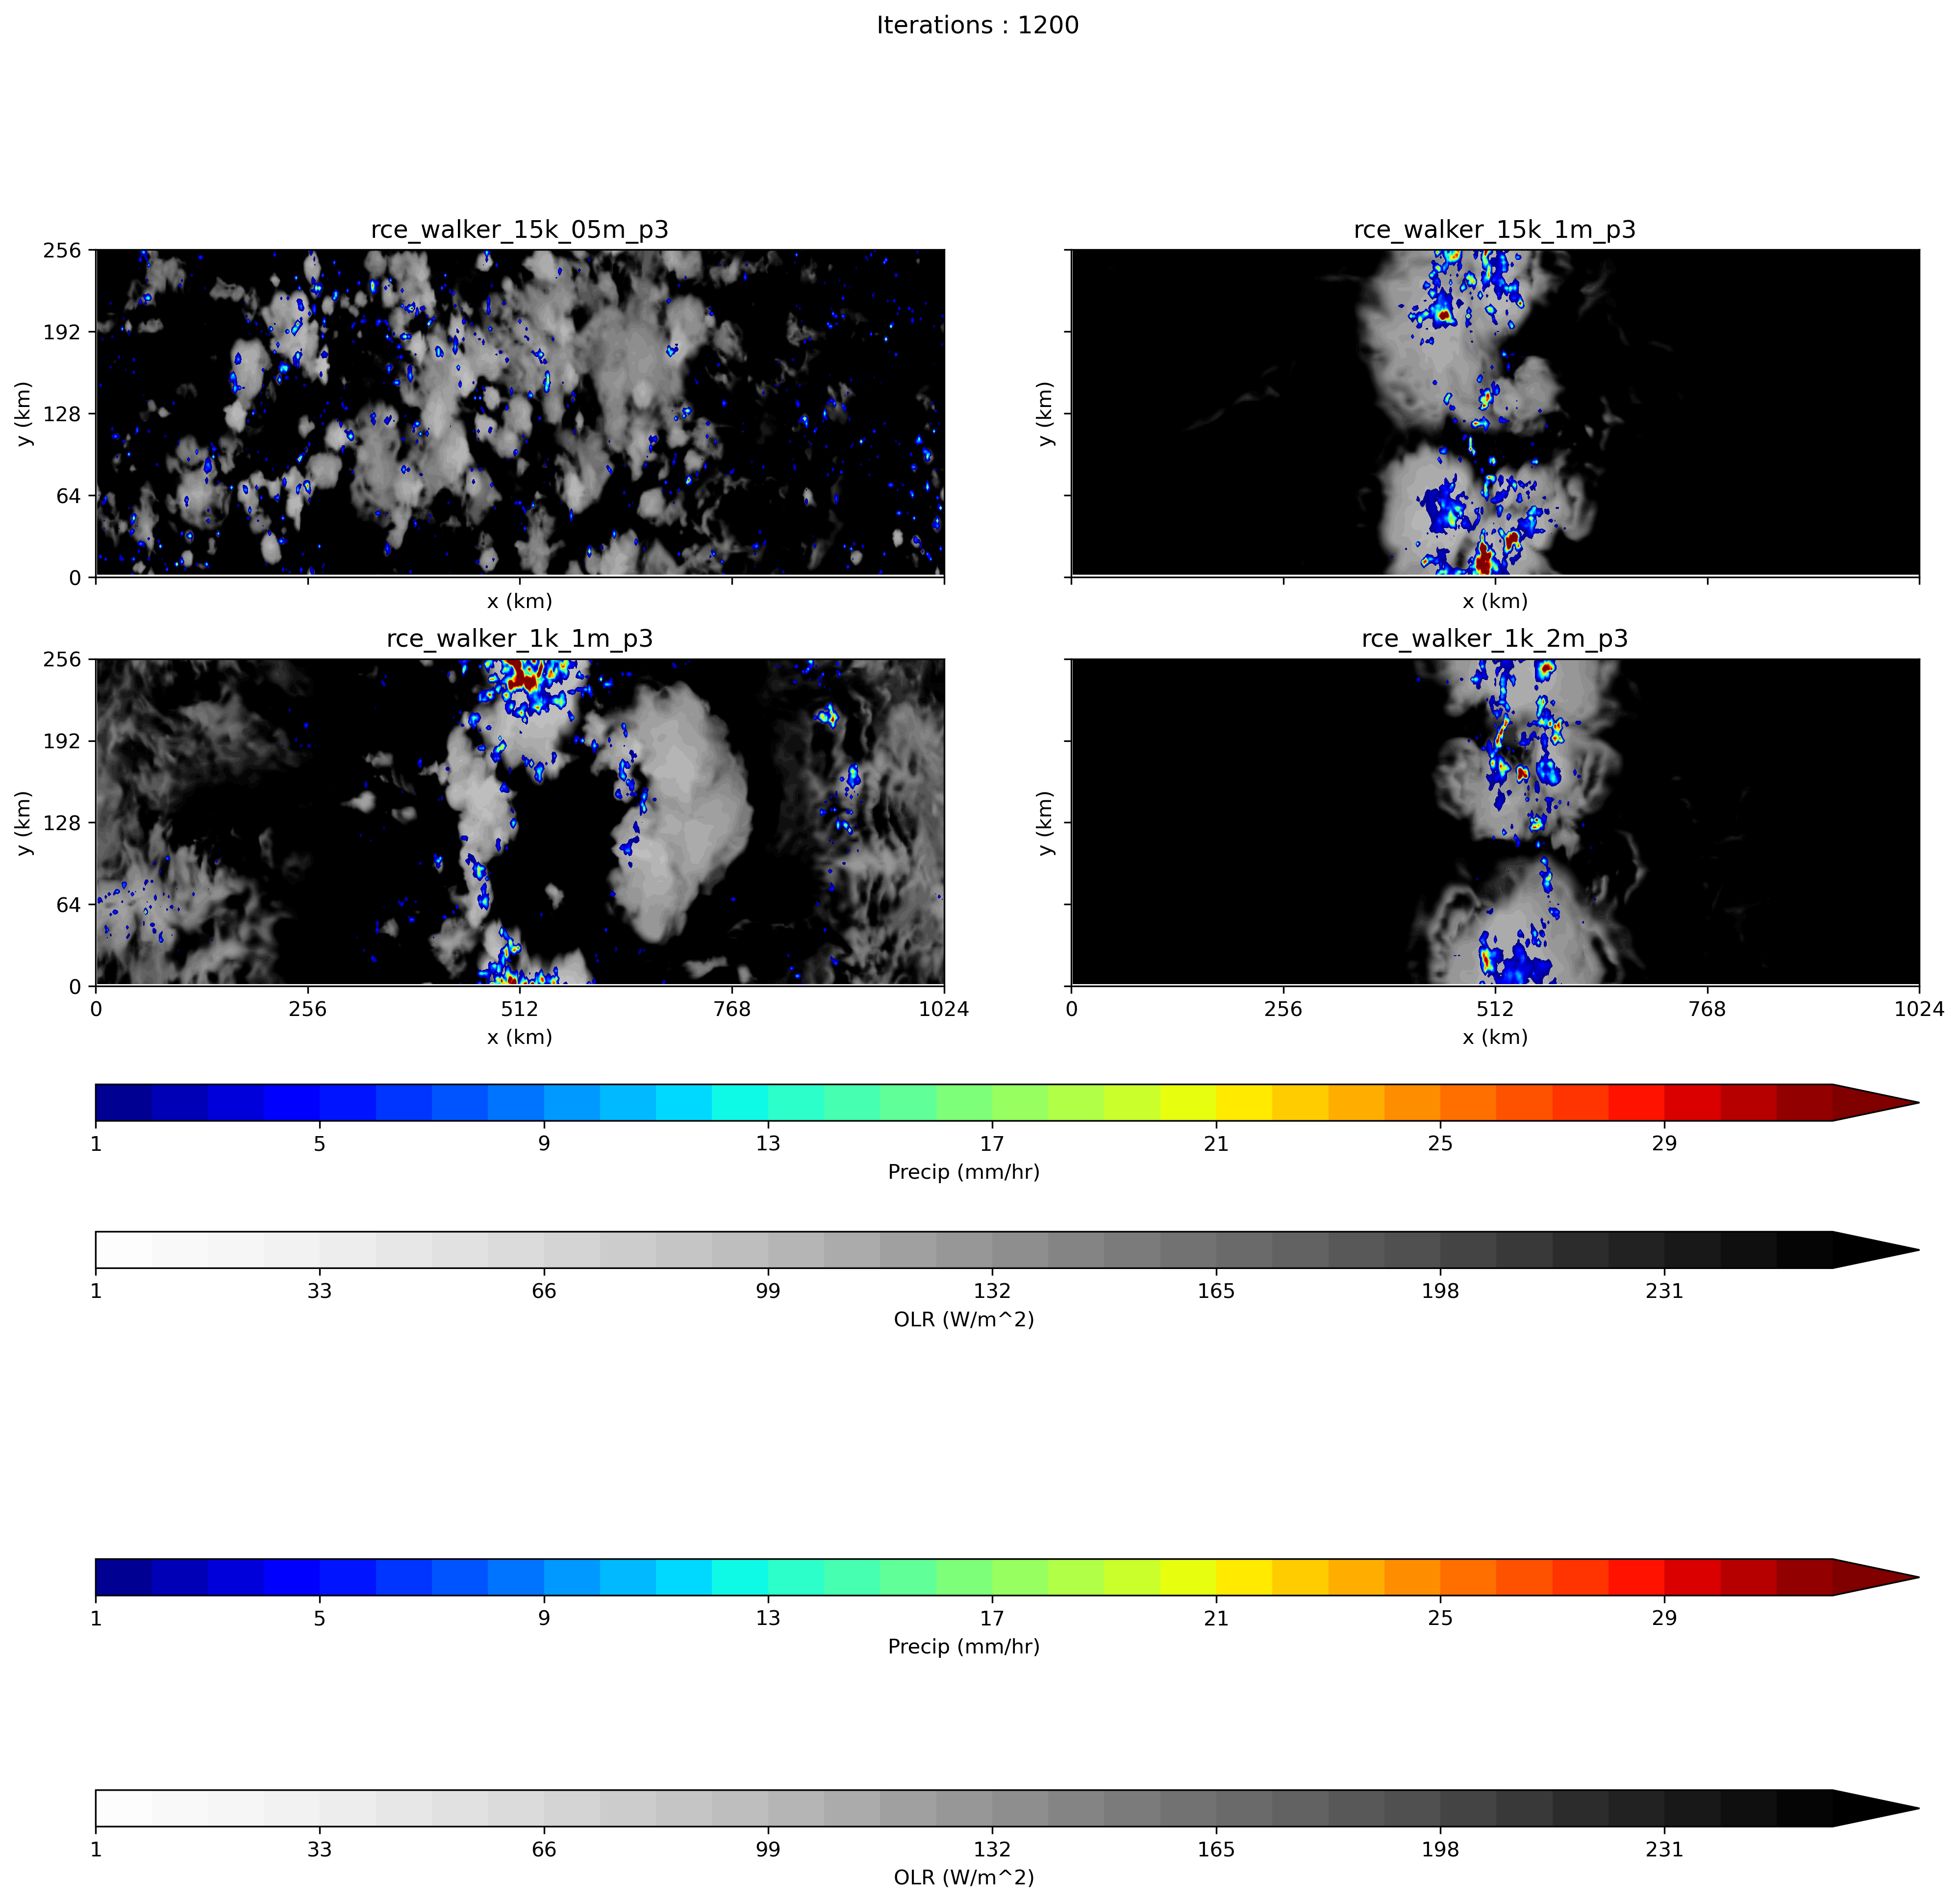

In [7]:
test = GIFs()
test.run()